In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay,silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans , DBSCAN

In [2]:
df = pd.read_csv('xclara.csv')

In [3]:
df.sample(5)

,V1,V2
2741,72.392770,-4.811533
578,4.207717,2.851358
423,12.521110,8.464080
1732,57.582510,67.854550
1137,39.095010,60.004540


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [5]:
df.shape

(3000, 2)

In [6]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

In [7]:
scale = StandardScaler()
for col in df.columns:
    df[col] = scale.fit_transform(df[[col]])

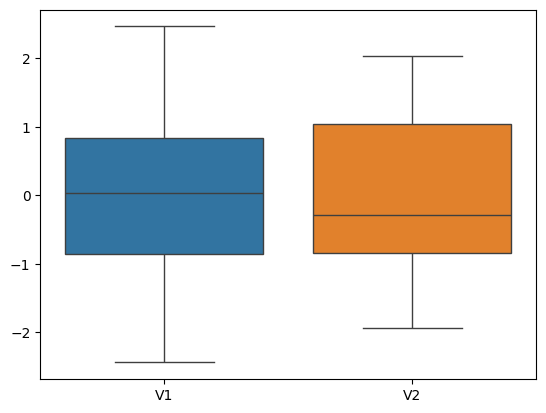

In [8]:
sns.boxplot(df)
plt.show()

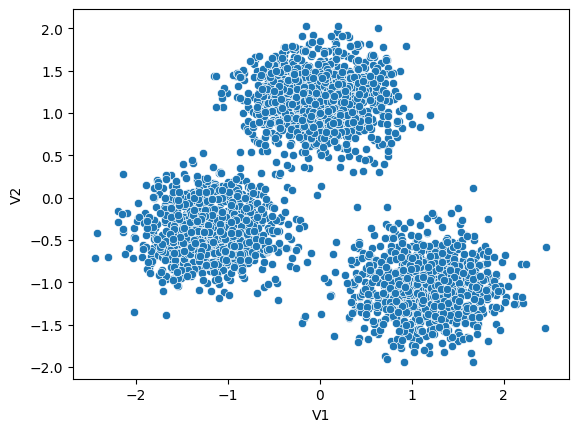

In [9]:
sns.scatterplot(x=df['V1'] , y=df['V2'])
plt.show()

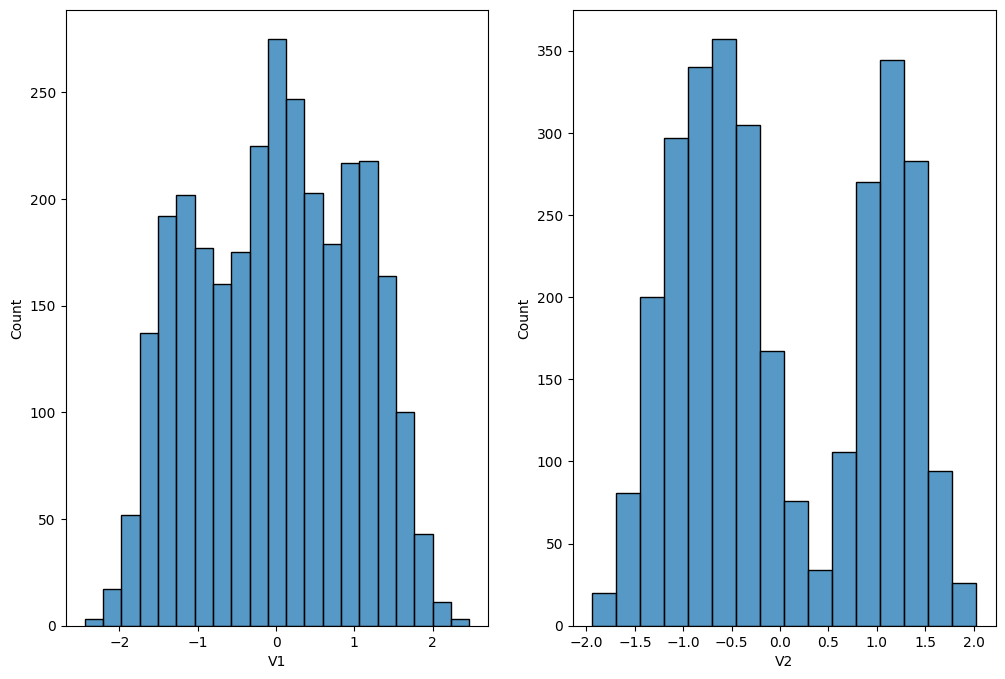

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.histplot(x=df['V1'])
plt.subplot(1,2,2)
sns.histplot(x=df['V2'])
plt.show()

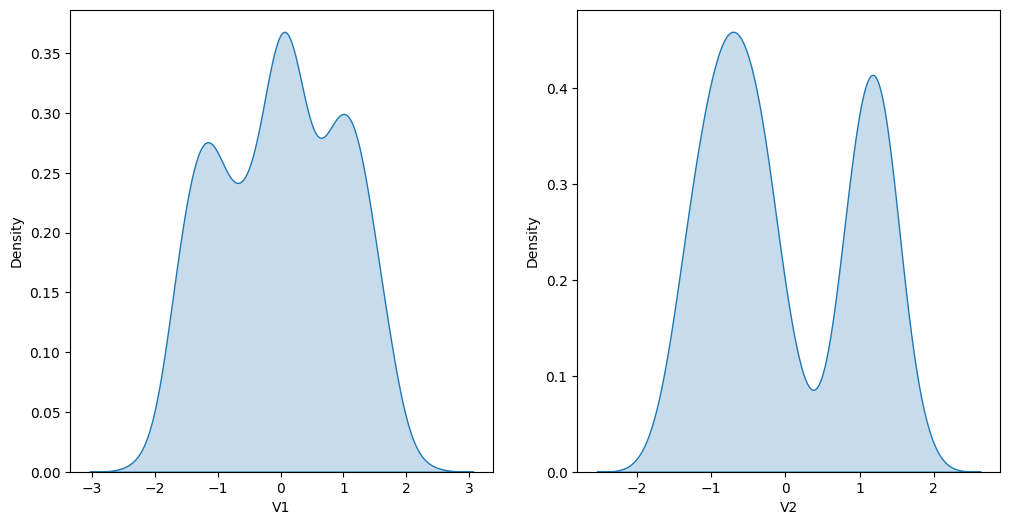

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(x=df['V1'],fill=True)
plt.subplot(1,2,2)
sns.kdeplot(x=df['V2'],fill=True)
plt.show()

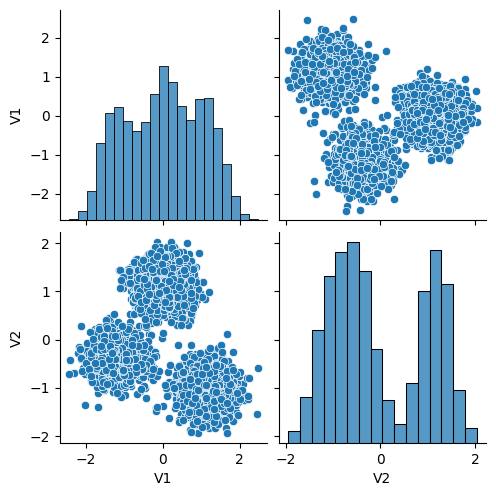

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
score = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    score.append(km.inertia_)

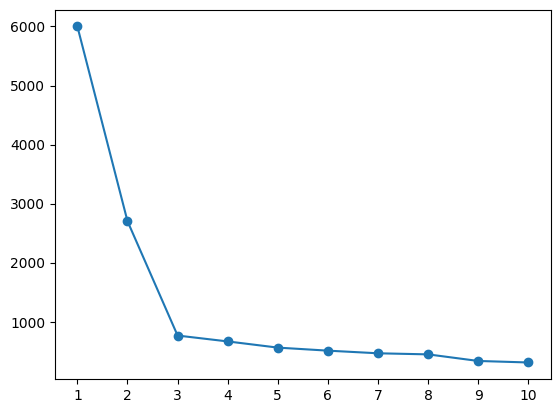

In [14]:
plt.plot(range(1,11) , score , marker='o')
plt.xticks(range(1,11))
plt.show()

In [15]:
score = -1
n = -1
for i in range(2,11):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(df)
    temp = silhouette_score(df,y)
    if temp > score:
        score = temp
        n = i

In [16]:
score , n

(np.float64(0.6911757707642779), 3)

In [17]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)

In [18]:
df['Cluster'] = y_pred

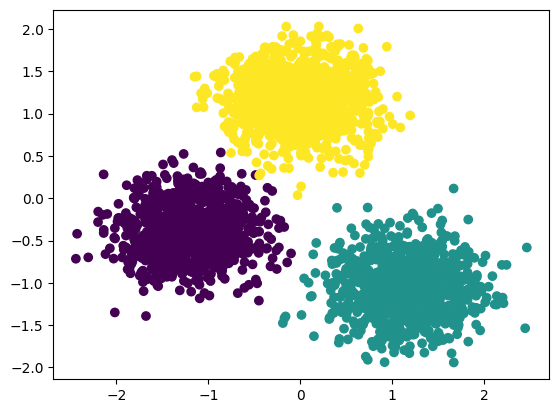

In [19]:
plt.scatter(df['V1'] , df['V2'] , c=df['Cluster'])
plt.show()

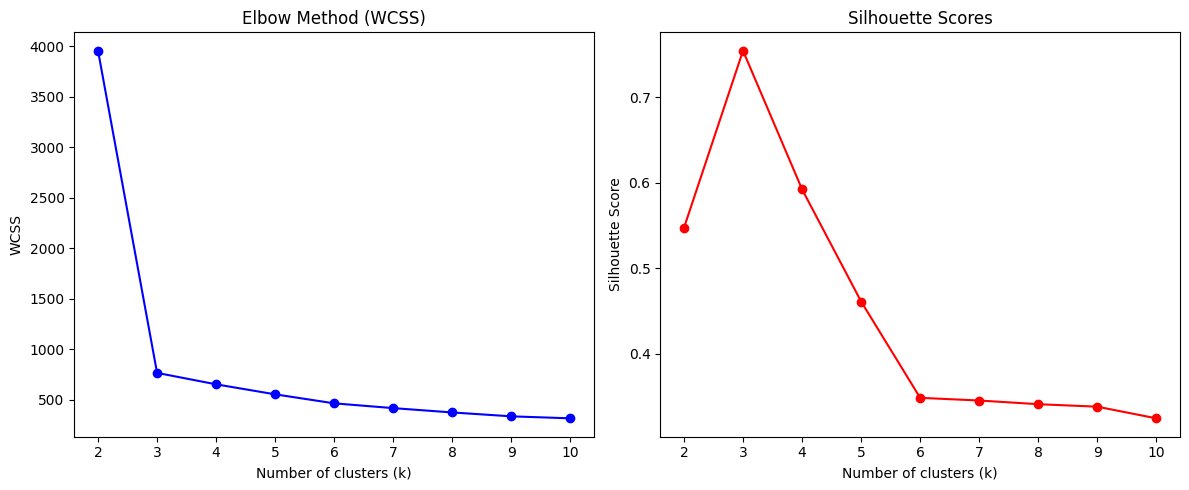

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    y = km.fit_predict(df)
    
    wcss.append(km.inertia_)
    
    sil_scores.append(silhouette_score(df, y))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'ro-')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [21]:
db = DBSCAN(eps=0.8 , min_samples=2).fit(df)
labels = db.labels_

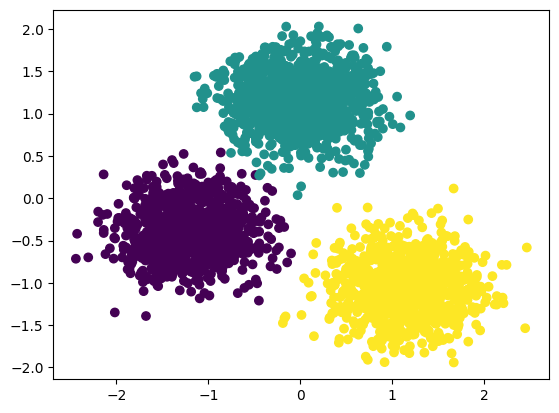

In [22]:
plt.scatter(df['V1'] , df['V2'] , c = labels)
plt.show()